# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Data Analysis

In [3]:
print(f'The shape of dataset is',df.shape)

The shape of dataset is (2200, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

# Exploratory Data Analysis

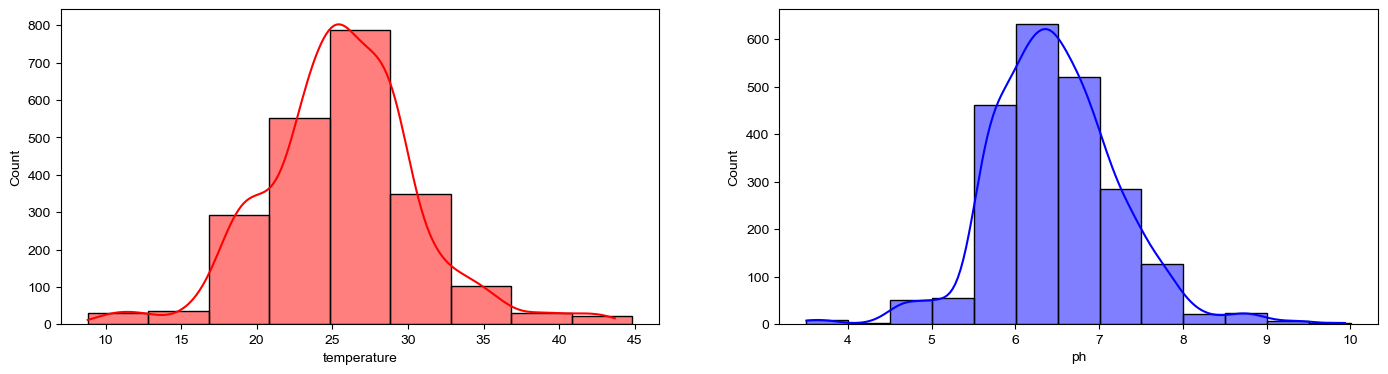

In [10]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df.temperature ,binwidth=4 , color="red" , kde=True)
plt.subplot(2,2,2)
sns.histplot(df.ph ,binwidth=0.5 ,color = "blue", kde=True)
sns.set_style('darkgrid')
plt.show()

Observations : 
1.The Temperatures mostly ranged from 15 to 35, which means that most of the plants  need at least a high or medium temperature.
2.The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant

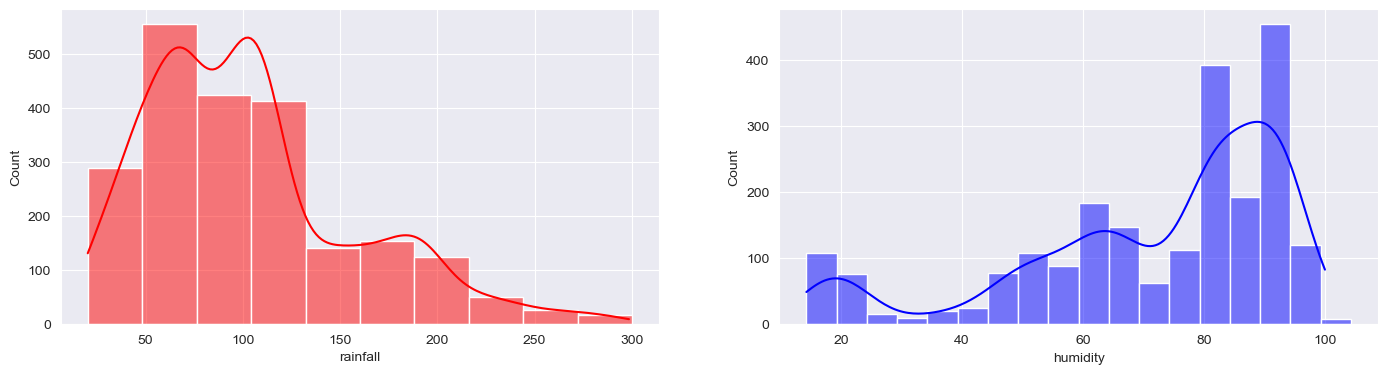

In [11]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df.rainfall ,  binwidth=28 ,color="red" , kde=True)
plt.subplot(2,2,2)
sns.histplot(df.humidity ,  binwidth=5 ,color="blue" , kde=True)
sns.set_style('darkgrid')
plt.show()

The Rainfall rates ranged mostly from 50 mm to 200 mm.

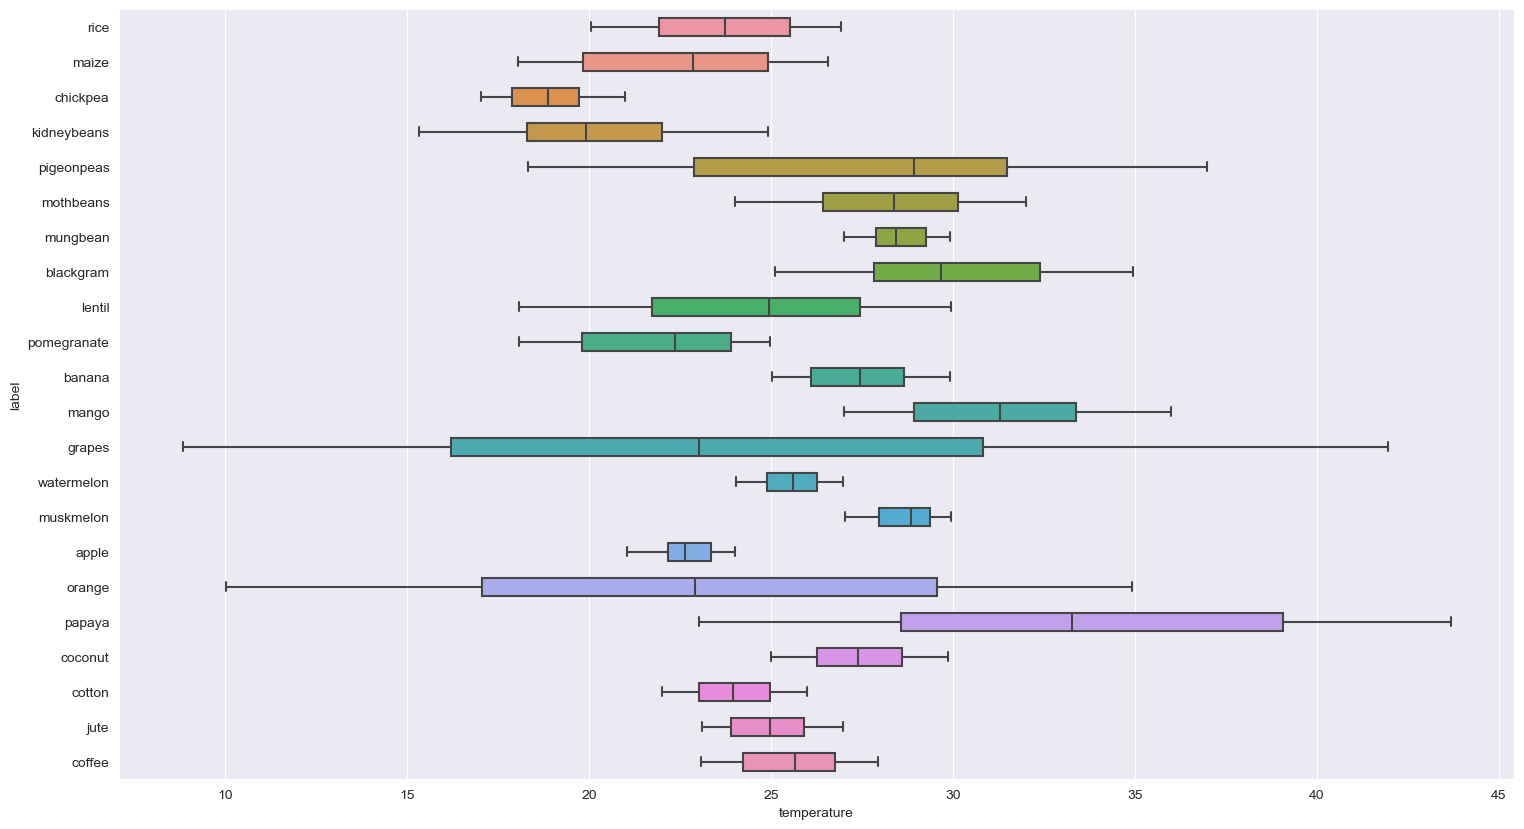

In [12]:
# temperature for different crops
plt.figure(figsize=(18,10))
sns.boxplot(x="temperature", y="label", data=df,width=0.5 , orient="h")
plt.show()


As shown in the figure,plants that need high or low temperatures.


# Finding Average

In [13]:
n_avg = df['N'].mean()
print(f'Average ratio of Nitrogen in Soil:',n_avg)

p_avg = df['P'].mean()
print(f'Average ratio of Phosphorous in Soil:',p_avg)

k_avg = df['K'].mean()
print(f'Average ratio of Potassium in Soil:',k_avg)

temp_avg = df['temperature'].mean()
print(f'Average ratio of Temperature in Celsius:',temp_avg)

humi_avg = df['humidity'].mean()
print(f'Average ratio of Humidity in %:',humi_avg)

ph_avg = df['ph'].mean()
print(f'Average pH value of the soil:',ph_avg)

rain_avg = df['rainfall'].mean()
print(f'Average Rainfall in mm:',rain_avg)

Average ratio of Nitrogen in Soil: 50.551818181818184
Average ratio of Phosphorous in Soil: 53.36272727272727
Average ratio of Potassium in Soil: 48.14909090909091
Average ratio of Temperature in Celsius: 25.616243851779544
Average ratio of Humidity in %: 71.48177921778637
Average pH value of the soil: 6.469480065256364
Average Rainfall in mm: 103.46365541576817


# Season wise Crops

In [14]:
summer_crops = df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique()
print(f'Summer Crops:',summer_crops)

Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


In [15]:
winter_crops = df[(df['temperature'] < 20) & (df['humidity'] < 50)]['label'].unique()
print(f'Winter Crops:',winter_crops)

Winter Crops: ['chickpea' 'kidneybeans' 'pigeonpeas']


In [16]:
rainy_crops = df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique()
print(f'Rainy Crops:',rainy_crops)

Rainy Crops: ['rice' 'papaya' 'coconut']


# Potassium Requirements

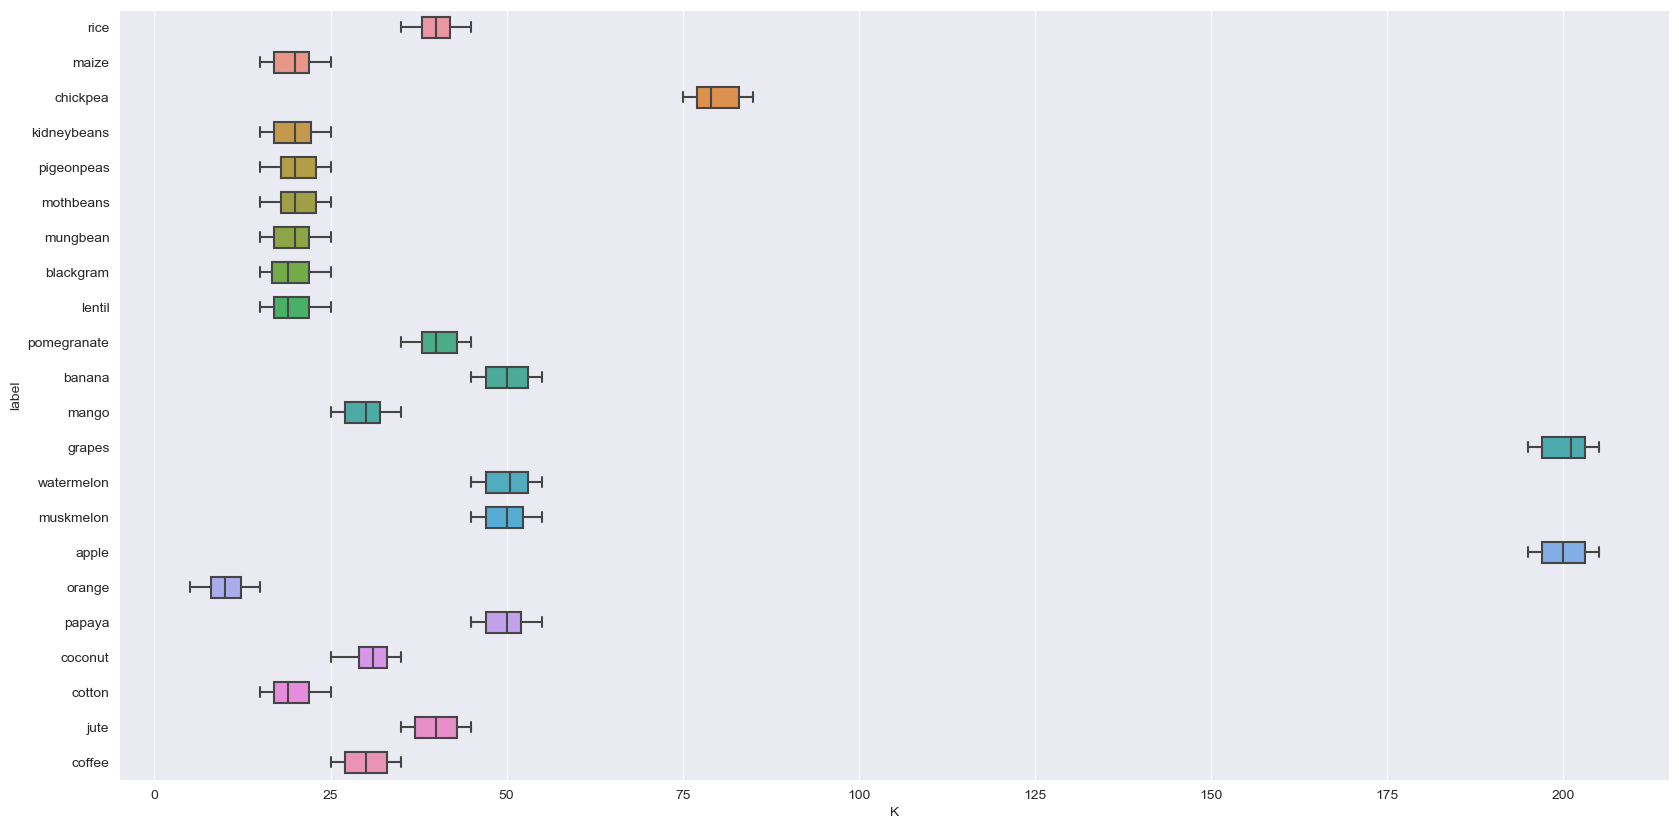

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(x="K", y="label", data=df,width=0.6,orient="h" )
plt.show()

In [18]:
low_k = df[df['K']  < 15]['label'].unique()
print(f'Crops which requires very Low Ratio of Potassium Content in Soil:',low_k)

Crops which requires very Low Ratio of Potassium Content in Soil: ['orange']


In [19]:
high_k = df[df['K']  > 150]['label'].unique()
print(f'"Crops which requires very high Ratio of Potassium Content in Soil:',high_k)

"Crops which requires very high Ratio of Potassium Content in Soil: ['grapes' 'apple']


# Phosphorous Requirement

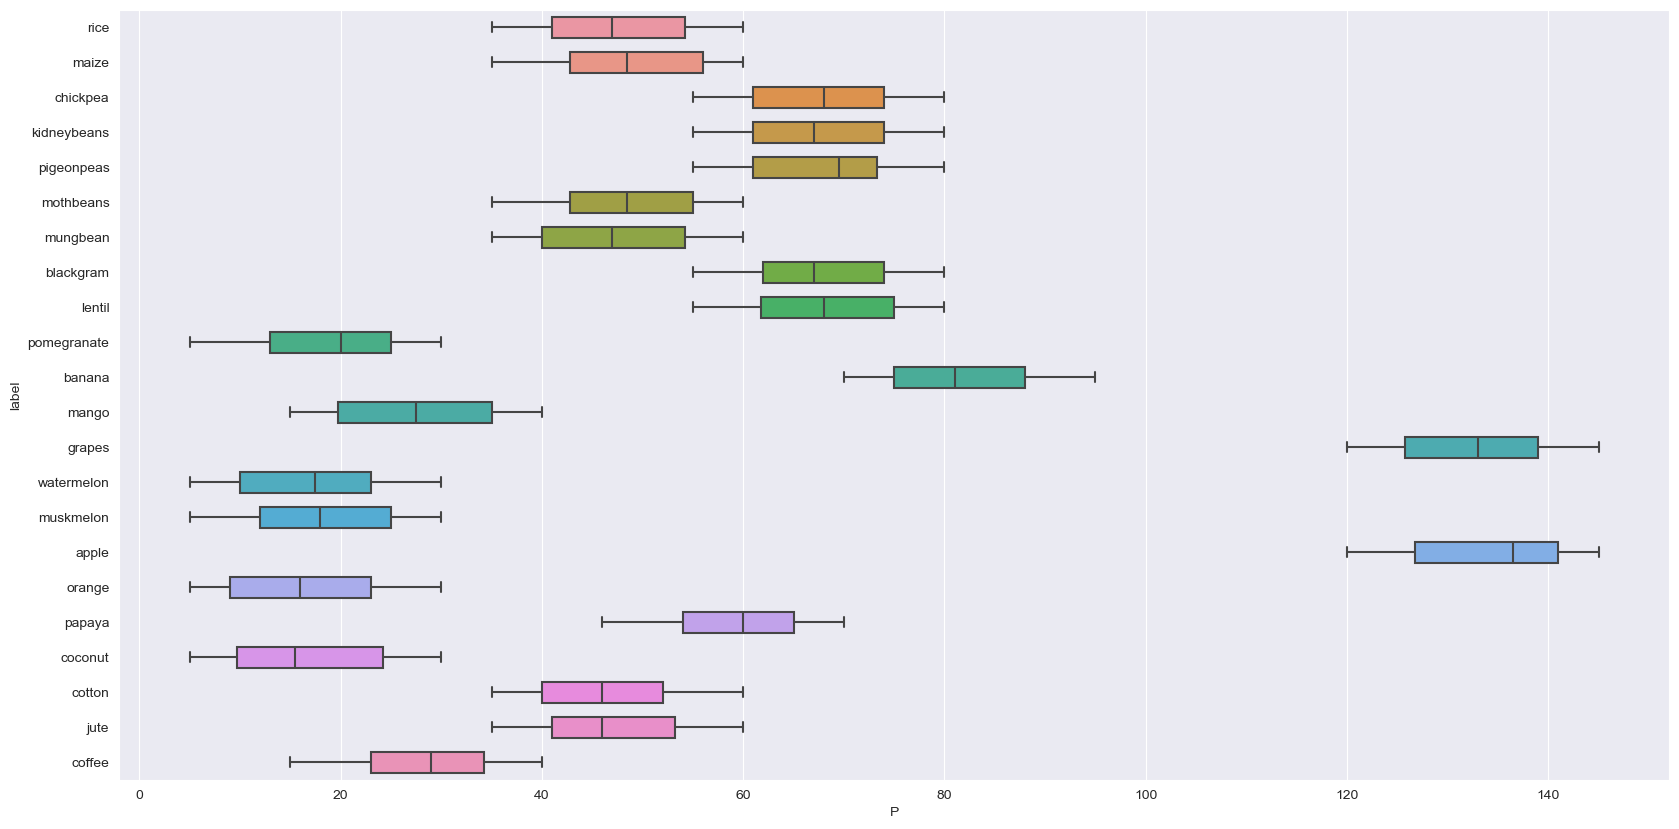

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(x="P", y="label", data=df,width=0.6,orient="h" )
plt.show()

In [21]:
low_p = df[df['P']  < 15]['label'].unique()
print(f'Crops which requires very Low Ratio of Phosphorus Content in Soil:',low_p)

Crops which requires very Low Ratio of Phosphorus Content in Soil: ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']


In [22]:
high_p = df[df['P']  > 120]['label'].unique()
print(f'Crops which requires very High Ratio of Phosphorus Content in Soil:',high_p)

Crops which requires very High Ratio of Phosphorus Content in Soil: ['grapes' 'apple']


# Nitrogen Requirement

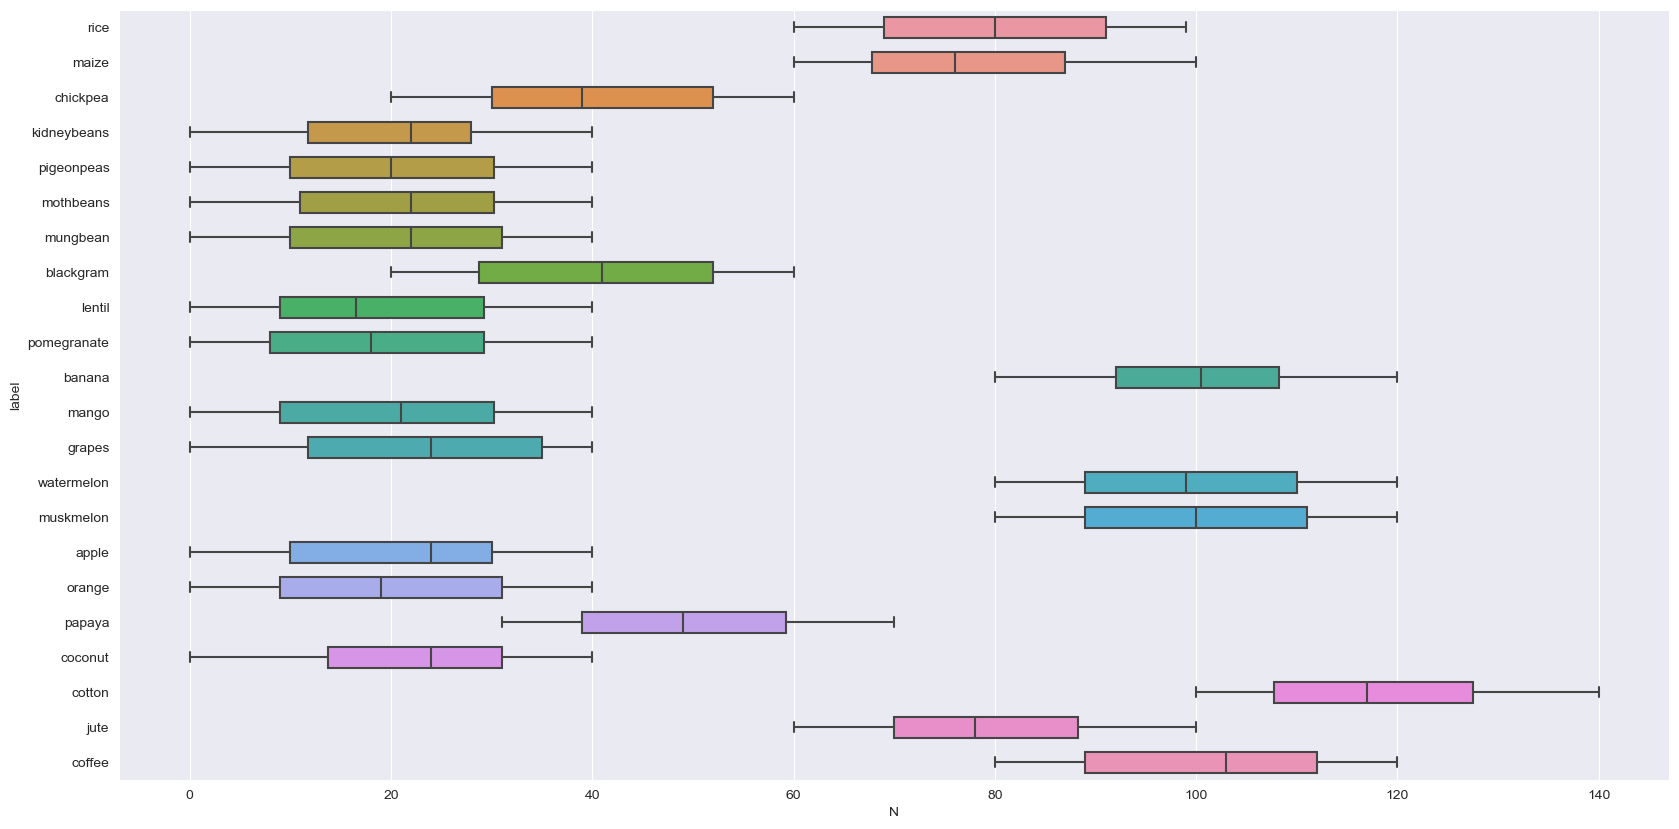

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x="N", y="label", data=df,width=0.6,orient="h" )
plt.show()

In [24]:
low_n = df[df['N']  < 10]['label'].unique()
print(f'Crops which requires very Low Ratio of Nitrogen Content in Soil:',low_n)

Crops which requires very Low Ratio of Nitrogen Content in Soil: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate'
 'mango' 'grapes' 'apple' 'orange' 'coconut']


In [25]:
high_n = df[df['N']  > 100 ]['label'].unique()
print(f'Crops which requires very High Ratio of Nitrogen Content in Soil:',high_n)

Crops which requires very High Ratio of Nitrogen Content in Soil: ['banana' 'watermelon' 'muskmelon' 'cotton' 'coffee']


# Correlation between variables

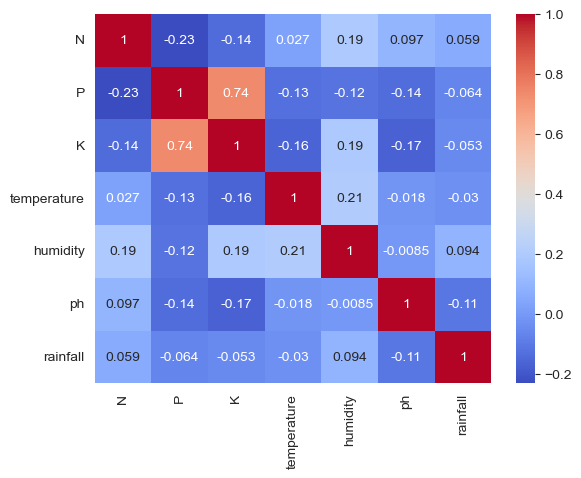

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' )
plt.show()

# Feature Selection

In [27]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [28]:
print("The Shape of x:", x.shape)
print("The Shape of y:", y.shape)

The Shape of x: (2200, 7)
The Shape of y: (2200,)


# Splitting the Dataset

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Feature Scaling

In [30]:
# Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_transformed = sc.fit_transform(x_train)
x_test_transformed = sc.transform(x_test)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_transformed,y_train)

y_pred_test = dtc.predict(x_test_transformed)
y_pred_train = dtc.predict(x_train_transformed)

from sklearn.metrics import confusion_matrix,accuracy_score
print(f'Training Accuracy:',accuracy_score(y_train,y_pred_train))
print(f'Testing Accuracy:',accuracy_score(y_test,y_pred_test))

Training Accuracy: 1.0
Testing Accuracy: 0.9931818181818182


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(x_train_transformed,y_train)

y_pred_train = rfc.predict(x_train_transformed)
y_pred_test = rfc.predict(x_test_transformed)

print(f'Training Accuracy:',accuracy_score(y_train,y_pred_train))
print(f'Testing Accuracy:',accuracy_score(y_test,y_pred_test))


Training Accuracy: 1.0
Testing Accuracy: 0.9977272727272727


# Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
rfc = RandomForestClassifier()

In [35]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
param_grid = {'max_depth':[2,4,8,10],'min_samples_split':[2,3,4,5]}

In [37]:
gridcv = GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy')

In [38]:
gridcv.fit(x_train_transformed,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [39]:
gridcv.best_params_

{'max_depth': 10, 'min_samples_split': 2}

In [40]:
bestrfc = RandomForestClassifier(max_depth=10,min_samples_split=3)

In [41]:
bestrfc.fit(x_train_transformed,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=3)

In [42]:
y_pred_train = bestrfc.predict(x_train_transformed)
y_pred_test = bestrfc.predict(x_test_transformed)

print(f'Training Accuracy:',accuracy_score(y_train,y_pred_train))
print(f'Testing Accuracy:',accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.9982954545454545
Testing Accuracy: 0.9977272727272727


In [43]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [44]:
# Prediction
bestrfc.predict((np.array([[90, # Nitrogen
                            40, # Phosphorous
                            40, # Potassium
                            20, # Temperature
                            80, # Humidity
                            7,  # ph
                            200]]))) # rainfall

array(['apple'], dtype=object)

# K Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_transformed,y_train)

y_pred_train = knn.predict(x_train_transformed)
y_pred_test = knn.predict(x_test_transformed)

print(f'Training Accuracy:',accuracy_score(y_train,y_pred_train))
print(f'Testing Accuracy:',accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.9835227272727273
Testing Accuracy: 0.9772727272727273
